In [290]:
import pandas as pd # Para a instalação da biblioteca PANDAS
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn import tree
from sklearn.svm import SVC
import seaborn as sns # Para a instalação da biblioteca SEABORN
import matplotlib.pyplot as plt # Para a instalação da biblioteca MATPLOTLIB


In [291]:
tabela_dados = r'C:\\Users\dsadm\Desktop\formativavictor\dados_produtos.csv'  # Adição da tabela de dados para a continuação do código


In [292]:
df = pd.read_csv(tabela_dados) # Ler os dados

print(df.head()) # Mostrar os dados

  product_name  rating  rating_count  purchased
0    Televisão    3.04            29          1
1      Celular    3.46          3872          0
2    Cafeteira    3.25          1187          0
3    Televisão    3.77          4097          1
4    Videogame    5.00          4738          1


In [293]:
print(df.info()) # Mostrar informações da base de dados 
print(df.describe()) # Mostrar a descrição dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None
           rating  rating_count  purchased
count  100.000000    100.000000     100.00
mean     4.056900   2536.670000       0.55
std      0.588344   1458.312544       0.50
min      3.020000     10.000000       0.00
25%      3.580000   1433.250000       0.00
50%      4.105000   2424.000000       1.00
75%      4.505000   3773.000000       1.00
max      5.000000   4977.000000       1.00


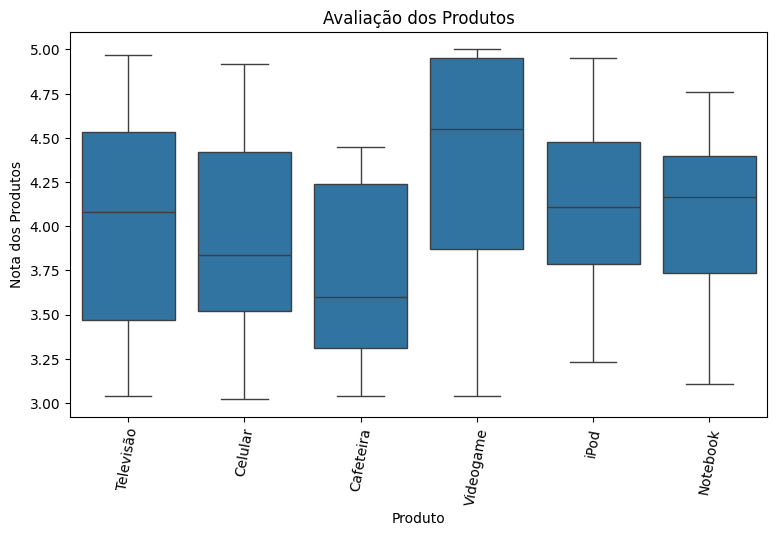

In [294]:
plt.figure(figsize=(9, 5)) # Definir o tamanho da figura do boxplot
sns.boxplot(x='product_name', y='rating', data=df) # Trocar os nomes pelos nomes dos produtos presentes
plt.title('Avaliação dos Produtos') # Definindo o título
plt.xlabel('Produto') # Definindo o legenda dos produtos na parte inferior
plt.ylabel('Nota dos Produtos') # Definindo a legenda da nota dos produtos na esquerda do boxplot
plt.xticks(rotation=80) # Rotação dos nomes dos produtos
plt.show() # Mostrar boxplot depois das alterações feitas

In [295]:
df = df.drop_duplicates() # Remover dados duplicados

In [296]:
df = df.dropna() # Remover linhs com dados faltando

In [297]:
print(df.info()) # Mostrar as informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None


In [298]:
x = df[['rating','rating_count']]
y = df[['purchased']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)


Mean Squared Error: 0.65
0.65 [[ 2  3]
 [10  5]]


[Text(0.5, 0.96875, '3.46 <= 1962.5\nsquared_error = 0.25\nsamples = 80\nvalue = 0.5'),
 Text(0.2857142857142857, 0.90625, '3.04 <= 4.265\nsquared_error = 0.211\nsamples = 33\nvalue = 0.303'),
 Text(0.21428571428571427, 0.84375, '3.04 <= 3.61\nsquared_error = 0.149\nsamples = 22\nvalue = 0.182'),
 Text(0.17857142857142858, 0.78125, '3.04 <= 3.515\nsquared_error = 0.231\nsamples = 11\nvalue = 0.364'),
 Text(0.14285714285714285, 0.71875, '3.46 <= 1458.5\nsquared_error = 0.21\nsamples = 10\nvalue = 0.3'),
 Text(0.07142857142857142, 0.65625, '3.04 <= 3.465\nsquared_error = 0.139\nsamples = 6\nvalue = 0.167'),
 Text(0.03571428571428571, 0.59375, 'squared_error = 0.0\nsamples = 4\nvalue = 0.0'),
 Text(0.10714285714285714, 0.59375, '3.04 <= 3.5\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.07142857142857142, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.14285714285714285, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.21428571428571427, 0.

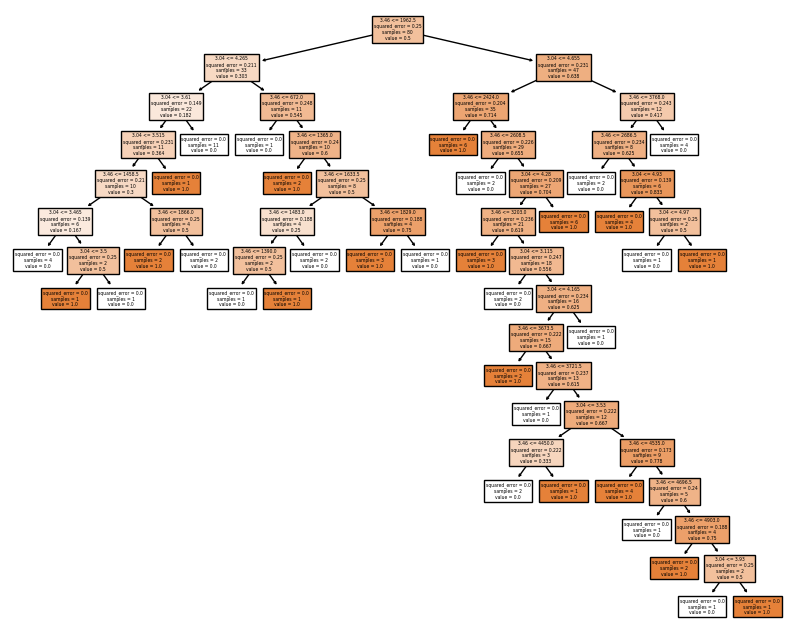

In [299]:
x = df[['rating', 'rating_count']]
y = df['purchased']
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,
                                                     test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(x_treino, y_treino)
prev = model.predict(x_teste)
mse = mean_squared  _error(y_teste, prev)
print("Mean Squared Error:", mse)
matrix = confusion_matrix(y_teste,prev)
print(mse, matrix)
df['purchased'] = df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model, feature_names=df['rating'].tolist(), class_names=df['purchased'].unique().tolist(), filled=True)